In [21]:
import os
import sys

import joblib
import pandas as pd

sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [2]:
from pathlib import Path
import anndata as ad
import scanpy as sc

import config

from sklearn.metrics import silhouette_samples

In [3]:
exp_name = "hp_search_scvi_on_meta_cells_2021_10_07__13_18_18"
exp_results_path = Path(config.RESULTS_DIR, exp_name)

In [4]:
study_file_name = "joblib_study.pkl"
study = joblib.load(Path(exp_results_path, study_file_name))

In [5]:
best_trail_params = study.best_trial.params
trail_result_dir = Path(exp_results_path,
                        f"hidden_{best_trail_params['n_hidden']}_"
                        f"layers_{best_trail_params['n_layers']}_"
                        f"latent_{best_trail_params['n_latent']}_"
                        f"neighbors_{best_trail_params['n_neighbors']}_"
                        f"dropout_{best_trail_params['dropout_rate']}_"
                        f"epochs_{best_trail_params['epochs']}")

In [6]:
img_file_name = Path(trail_result_dir, 'umap_annotation_on_graph_with_scvi_embedding.pdf')
adata_file_path = Path(trail_result_dir, 'adata_with_annot_and_scvi.h5ad')
os.listdir(trail_result_dir)

['logs',
 'umap_annotation_on_graph_with_scvi_embedding.pdf',
 'adata_with_annot_and_scvi.h5ad']

In [7]:
adata = ad.read_h5ad(adata_file_path)

In [8]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10)

In [9]:
sc.tl.umap(adata, min_dist=0.15)

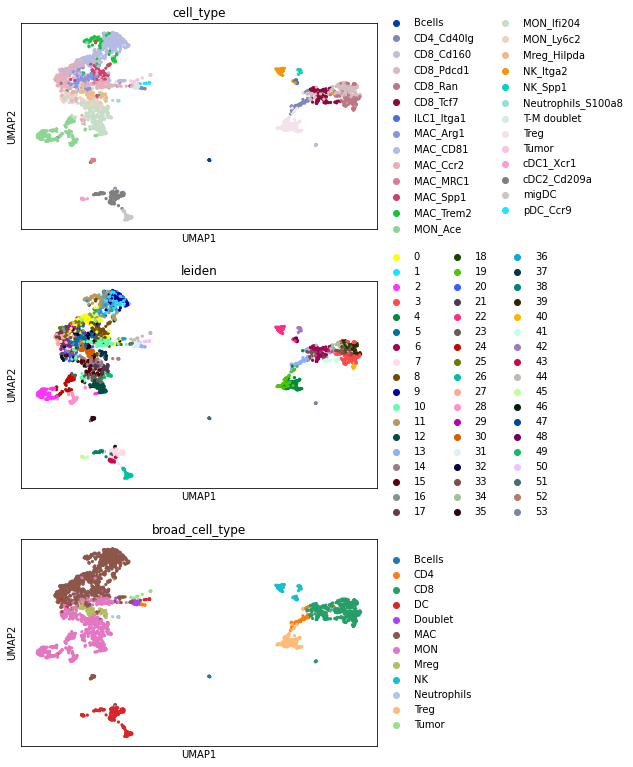

In [10]:
sc.pl.umap(adata, color=["cell_type", "leiden", "broad_cell_type"], ncols=1, save=True) #), legend_loc='on data')

recomend meta cells to relabel

In [25]:
X = adata.obsm["X_scVI"]
clusters = adata.obs["cell_type"]
broad_clusters = adata.obs["broad_cell_type"]

In [32]:
silhouette = silhouette_samples(X, labels=list(clusters))
silhouette_series = pd.Series(index=adata.obs_names, data=silhouette)
silhouette_broad = silhouette_samples(X, labels=list(broad_clusters))
silhouette_series_broad = pd.Series(index=adata.obs_names, data=silhouette_broad)

(<AxesSubplot:>, <AxesSubplot:>)

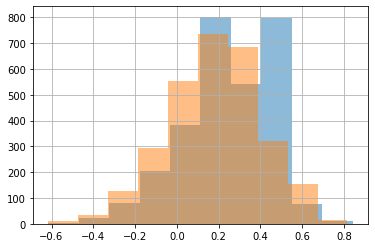

In [37]:
silhouette_series_broad.hist(alpha=0.5),\
silhouette_series.hist(alpha=0.5)

In [ ]:
df = pd.DataFrame.from_seieses(silhouette_series, clusters)

df["is_outlier"] = None
for group in df.groupby(clusters_col_name):

